In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("../results/outputs/scaled_telco_data.csv")

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df = df.dropna(subset=['TotalCharges'])

Creating New Features

In [2]:
# New Feature 1: Services Count
yes_cols = [col for col in df.columns if col.endswith('_Yes') and any(s in col for s in ['OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies'])]

df['services_count'] = df[yes_cols].sum(axis=1)

In [3]:
# New Feature 2: Tenure Group (pure numeric)
df['tenure_group'] = pd.cut(df['tenure'],
                            bins=[-1, 6, 12, 24, 48, 72],
                            labels=False)

In [4]:
# New Feature 3: Average Charge Per Month
df['avg_charge_per_month'] = df['TotalCharges'] / (df['tenure'].replace(0,1))

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 42 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   gender                                   7043 non-null   int64  
 1   SeniorCitizen                            7043 non-null   int64  
 2   Partner                                  7043 non-null   int64  
 3   Dependents                               7043 non-null   int64  
 4   tenure                                   7043 non-null   int64  
 5   PhoneService                             7043 non-null   int64  
 6   Contract                                 7043 non-null   float64
 7   PaperlessBilling                         7043 non-null   int64  
 8   MonthlyCharges                           7043 non-null   float64
 9   TotalCharges                             7043 non-null   float64
 10  Churn                                    7043 no

Visualization

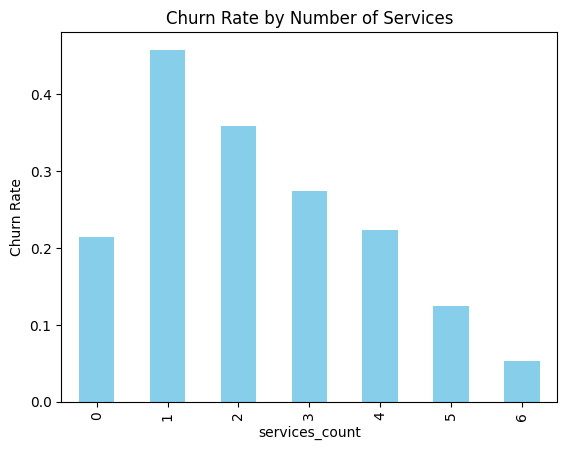

In [6]:
# Services Count vs Churn
df.groupby('services_count')['Churn'].mean().plot(kind='bar', color='skyblue')
plt.title("Churn Rate by Number of Services")
plt.ylabel("Churn Rate")
plt.show()

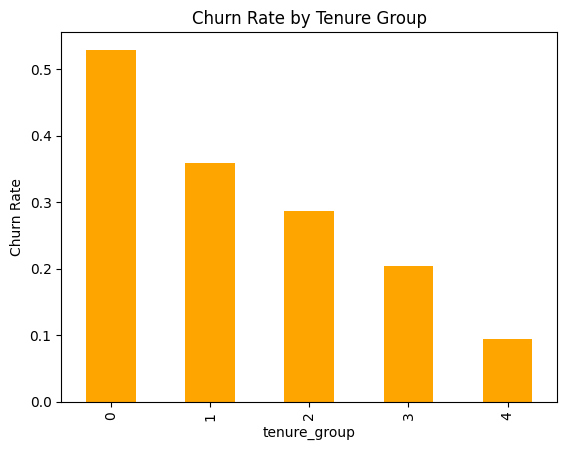

In [7]:
# Tenure Group vs Churn
df.groupby('tenure_group')['Churn'].mean().plot(kind='bar', color='orange')
plt.title("Churn Rate by Tenure Group")
plt.ylabel("Churn Rate")
plt.show()

In [8]:
df.to_csv('../results/outputs/feature_engineered_telco_data.csv', index=False)